# Importing required libraries

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Loading CSV dataset

In [2]:
ratings=pd.read_csv('/kaggle/input/amazon-books-reviews/Books_rating.csv')
books=pd.read_csv('/kaggle/input/amazon-books-reviews/books_data.csv')

# Checking column names

In [26]:
# Columns in ratings dataframe
print(ratings.columns)
# Columns in books dataframe
print(books.columns)

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')
Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')


# Checking Features Datatypes

In [27]:
# Datatypes of ratings dataframe
print(ratings.info())
# Datatypes of books dataframe
print(books.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  obje

# Checking dimensions of both dataset

In [7]:
ratings.shape, books.shape

((3000000, 10), (212404, 10))

# Merging both dataset based on Title feature

In [8]:
df=pd.merge(books, ratings, on='Title')

# Checking missing values in dataset

In [9]:
df.isnull().sum()

Title                     208
description            640225
authors                390634
image                  540306
previewLink            330623
publisher              782617
publishedDate          354581
infoLink               330623
categories             551498
ratingsCount          1360694
Id                          0
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

# Dropping datapoints where `Title` feature has missing values

In [10]:
df.drop(index=df[df['Title'].isnull()].index, inplace=True)

#### `Question:` Why removing values based on Title feature only?
#### `Answer:` Because our recommendation will based on book title in future.

# Checking duplicate datapoints in dataset

In [12]:
df.duplicated().sum()

8774

# Dropping duplicate datapoints in dataset

In [13]:
df.drop_duplicates(inplace=True,ignore_index=True)

# Extracting dataset where user gives review more than 150 times

In [14]:
x=df.groupby('User_id').count()['review/score']>=150
genuine_readers=x[x].index
filtered_readers=df[df['User_id'].isin(genuine_readers)]

# Extracting Books at which review is more than 50 times

In [17]:
y=df.groupby('Title').count()['review/score']>=50
books_name=y[y].index
final_ratings=filtered_readers[filtered_readers['Title'].isin(books_name)]

# Creating interaction matrix

In [20]:
recommendation_table=final_ratings.pivot_table(index='Title', columns='User_id', values='review/score')

#### Below is an example of how interaction matrix looks like

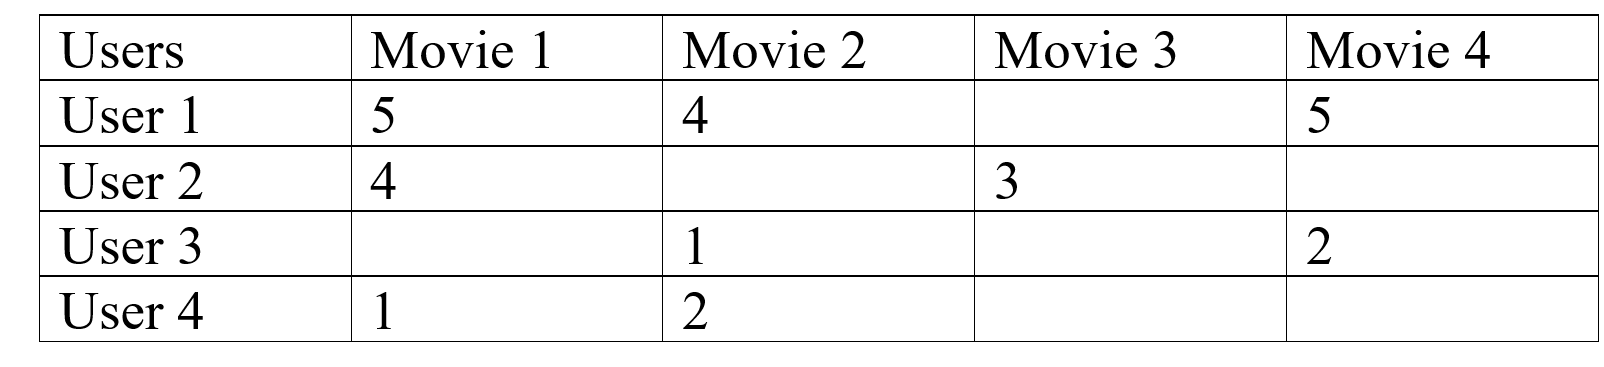

As you can see above image shows the Users rating on various movies. Similarly above pivot table will also represent the Book `Title` reviews by `User_id` based on number of `ratings`.
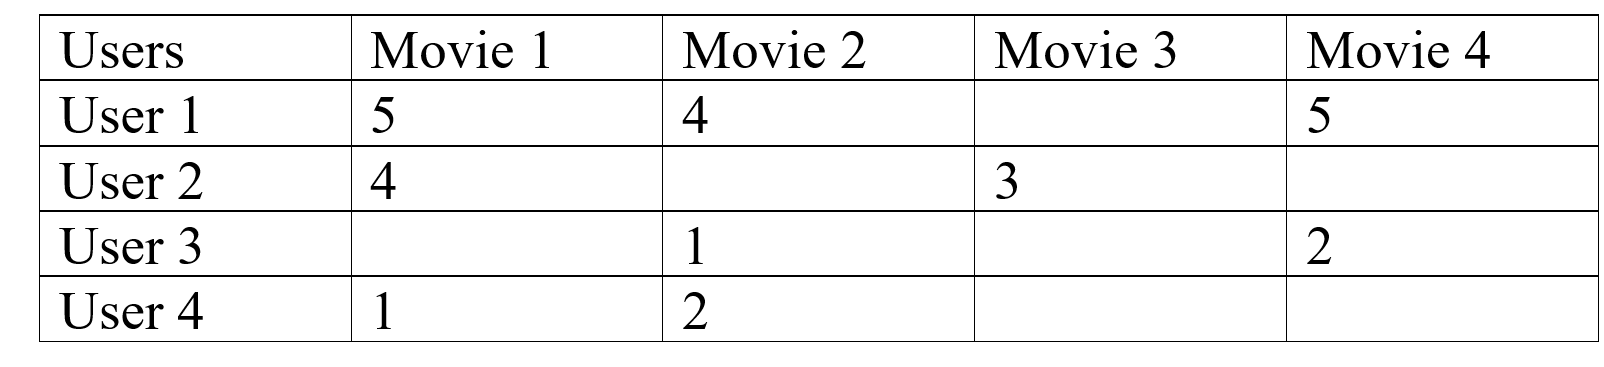

In [21]:
# Imputing all Nan values with 0 in above interaction matrix.
recommendation_table.fillna(0,inplace=True)

# Creating similarity matrix

In [23]:
similarity_score=cosine_similarity(recommendation_table)

# Getting recommendation based on given book name

In [24]:
def similar_books(book_name):
    similar_books_list=[]
    book_index=np.where(recommendation_table.index==book_name)[0][0]
    recommendations_index=sorted(list(enumerate(similarity_score[book_index])), key=lambda x: x[1], reverse=True)[:7]
    for i in recommendations_index:
        if recommendation_table.index[i[0]].lower() not in similar_books_list and recommendation_table.index[i[0]].lower()!=book_name.lower():
            similar_books_list.append(recommendation_table.index[i[0]].lower())
    return similar_books_list
        

# Displaying similar results

In [30]:
book_name='"More More More," Said the Baby Board Book (Caldecott Collection)'
similar_books(book_name)

['tales from silver lands',
 "foundation's fear - signed",
 'snuggle puppy!',
 'superhero abc',
 'what do you say, dear?',
 'the cat who went to heaven']